In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('calendar_activity_dataset.csv')
df.head()

,Gender,Activity begin time,Activity Name,Physical Intensity,Mental Intensity,Health Score,Activity end time,total time
0,F,3,Meditation,Low,High,65,3.9,0.9
1,M,8,Sleep Prep Routine,Low,Low,68,8.7,0.7
2,M,1,Gaming,Low,Medium,71,1.7,0.7
3,F,18,Reading,Low,High,64,19.7,1.7
4,F,4,Post-Lunch Walk,Low,Low,52,4.9,0.9


In [11]:
intensity_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
df['Physical'] = df['Physical Intensity'].map(intensity_mapping)
df['Mental'] = df['Mental Intensity'].map(intensity_mapping)
df.head()

,Gender,Activity begin time,Activity Name,Physical Intensity,Mental Intensity,Health Score,Activity end time,total time,Physical,Mental
0,F,3,Meditation,Low,High,65,3.9,0.9,0,2
1,M,8,Sleep Prep Routine,Low,Low,68,8.7,0.7,0,0
2,M,1,Gaming,Low,Medium,71,1.7,0.7,0,1
3,F,18,Reading,Low,High,64,19.7,1.7,0,2
4,F,4,Post-Lunch Walk,Low,Low,52,4.9,0.9,0,0


Activity begin time  Activity end time      0.99
Activity end time    Activity begin time    0.99
Physical             Health Score           0.47
Health Score         Physical               0.47
Mental               total time             0.35
total time           Mental                 0.35
dtype: float64


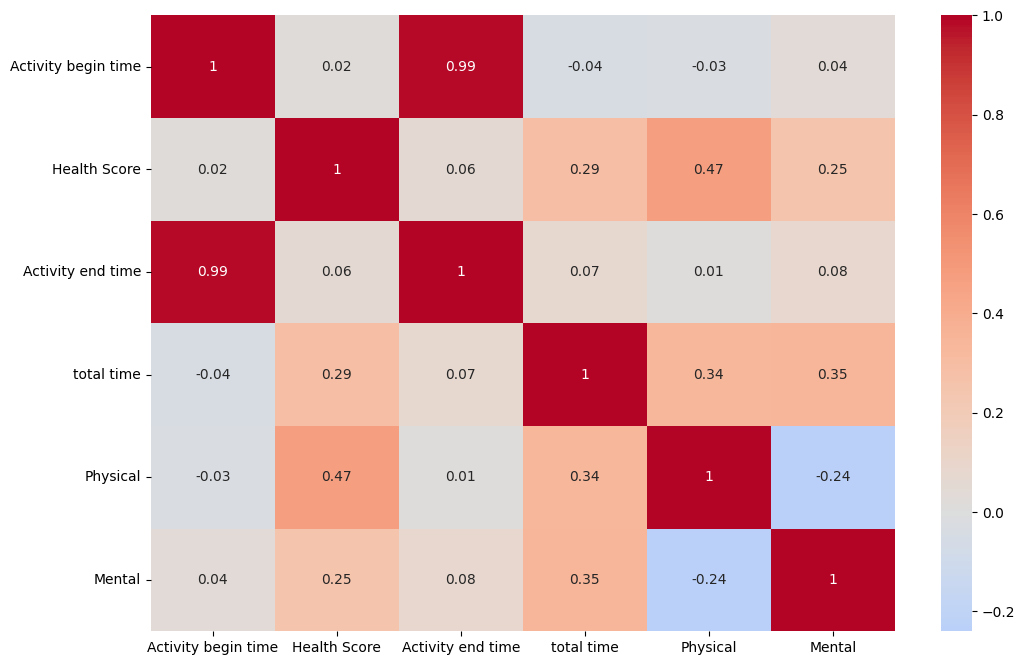

In [13]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', 
center=0)

# convert to one dimensional array
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
# chose nine strongest correlation and remove self correlation
strongest_correlations = sorted_correlations[sorted_correlations < 1].head(6)
print(strongest_correlations)